# Data Augmentation

## Preparing the Data

In [1]:
import tensorflow.keras as keras
import pandas as pd

# Load in our data from CSV files
train_df = pd.read_csv("data/asl_data/sign_mnist_train.csv")
valid_df = pd.read_csv("data/asl_data/sign_mnist_valid.csv")

# Separate out our target values
y_train = train_df['label']
y_valid = valid_df['label']
del train_df['label']
del valid_df['label']

# Separate our our image vectors
x_train = train_df.values
x_valid = valid_df.values

# Turn our scalar targets into binary categories
num_classes = 24
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

# Normalize our image data
x_train = x_train / 255
x_valid = x_valid / 255

# Reshape the image data for the convolutional network
x_train = x_train.reshape(-1,28,28,1)
x_valid = x_valid.reshape(-1,28,28,1)

## Model Creation

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=num_classes, activation="softmax"))

## Data Augmentation

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images horizontally
    vertical_flip=False, # Don't randomly flip images vertically
)  

## Batch Size

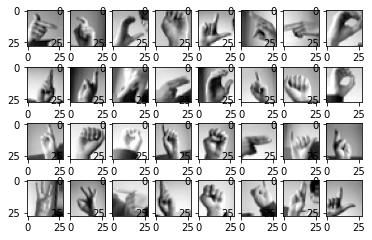

In [4]:
import matplotlib.pyplot as plt
import numpy as np
batch_size = 32
img_iter = datagen.flow(x_train, y_train, batch_size=batch_size)

x, y = img_iter.next()
fig, ax = plt.subplots(nrows=4, ncols=8)
for i in range(batch_size):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image), cmap="gray")
plt.show()

## Fitting the Data to the Generator

In [5]:
datagen.fit(x_train)

## Compiling the Model

In [6]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

## Training with Augmentation

In [7]:
model.fit(img_iter,
          epochs=20,
          steps_per_epoch=len(x_train)/batch_size, # Run same number of steps we would if we were not using a generator.
          validation_data=(x_valid, y_valid))

Epoch 1/20
857/857 [==============================] - 59s 67ms/step - loss: 1.1411 - accuracy: 0.6334 - val_loss: 0.5295 - val_accuracy: 0.8003
Epoch 2/20
857/857 [==============================] - 49s 57ms/step - loss: 0.3337 - accuracy: 0.8868 - val_loss: 4.5914 - val_accuracy: 0.4612
Epoch 3/20
857/857 [==============================] - 51s 59ms/step - loss: 0.2027 - accuracy: 0.9322 - val_loss: 0.2159 - val_accuracy: 0.9336
Epoch 4/20
857/857 [==============================] - 50s 58ms/step - loss: 0.1557 - accuracy: 0.9485 - val_loss: 0.1447 - val_accuracy: 0.9441
Epoch 5/20
857/857 [==============================] - 49s 57ms/step - loss: 0.1274 - accuracy: 0.9588 - val_loss: 0.0762 - val_accuracy: 0.9717
Epoch 6/20
857/857 [==============================] - 49s 57ms/step - loss: 0.1128 - accuracy: 0.9642 - val_loss: 0.6122 - val_accuracy: 0.8568
Epoch 7/20
857/857 [==============================] - 48s 56ms/step - loss: 0.0998 - accuracy: 0.9693 - val_loss: 0.1704 - val_accuracy:

## Preparing an Image for the Model

### Showing the Images

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image, cmap='gray')

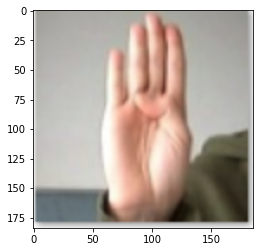

In [9]:
show_image('data/asl_images/b.png')

### Scaling the Images

In [10]:
from tensorflow.keras.preprocessing import image as image_utils

def load_and_scale_image(image_path):
    image = image_utils.load_img(image_path, color_mode="grayscale", target_size=(28,28))
    return image

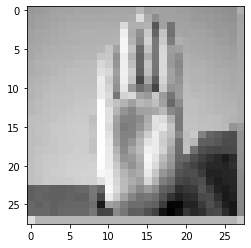

In [11]:
image = load_and_scale_image('data/asl_images/b.png')
plt.imshow(image, cmap='gray')

### Preparing the Image for Prediction

In [13]:
image = image_utils.img_to_array(image)
image = image.reshape(1,28,28,1) 
image = image / 255

## Making Predictions


In [14]:
prediction = model.predict(image)
print(prediction)

[[2.4688386e-37 1.0000000e+00 1.9598369e-26 1.9391756e-28 1.7437299e-15
  8.7880605e-21 1.5201913e-27 0.0000000e+00 2.7291375e-24 8.8851747e-36
  3.6251796e-28 4.1026049e-28 2.2520646e-38 0.0000000e+00 1.8017324e-38
  0.0000000e+00 9.3113486e-33 1.2444255e-37 9.1250734e-36 2.7904962e-13
  1.7169868e-27 2.0572448e-21 1.3499439e-32 3.0585697e-36]]


### Understanding the Prediction

In [15]:
import numpy as np
np.argmax(prediction)

1

In [16]:
# Alphabet does not contain j or z because they require movement
alphabet = "abcdefghiklmnopqrstuvwxy"
dictionary = {}
for i in range(24):
    dictionary[i] = alphabet[i]
dictionary

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'k',
 10: 'l',
 11: 'm',
 12: 'n',
 13: 'o',
 14: 'p',
 15: 'q',
 16: 'r',
 17: 's',
 18: 't',
 19: 'u',
 20: 'v',
 21: 'w',
 22: 'x',
 23: 'y'}

In [17]:
dictionary[np.argmax(prediction)]

'b'

## Put it all Together

In [18]:
def predict_letter(file_path):
    show_image(file_path)
    image = load_and_scale_image(file_path)
    image = image_utils.img_to_array(image)
    image = image.reshape(1,28,28,1) 
    image = image/255
    prediction = model.predict(image)
    # convert prediction to letter
    predicted_letter = dictionary[np.argmax(prediction)]
    return predicted_letter

'b'

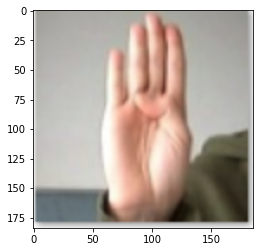

In [19]:
predict_letter("data/asl_images/b.png")

'a'

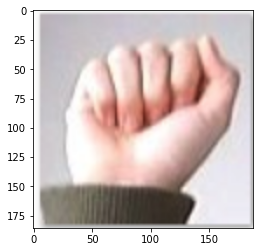

In [20]:
predict_letter("data/asl_images/a.png")